# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [47]:
df = pd.read_csv('weight-height.csv')

male_df =  df.loc[df['Gender'] == 'Male']
female_df = df.loc[df['Gender'] == 'Female']

print('Male Height mean:', male_df.Height.mean())
print('Male Height sd:', male_df.Height.std())      
print('Male Weight mean:', male_df.Weight.mean())
print('Male Weight sd:' ,male_df.Weight.std())   
print('Female Height mean:', female_df.Height.mean())
print('Female Height sd:' ,female_df.Height.std())      
print('Female Weight mean:', female_df.Weight.mean())
print('Female Weight sd:' ,female_df.Weight.std()) 

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621737
Male Height sd: 2.8633622286606517
Male Weight mean: 187.0206206581929
Male Weight sd: 19.781154516763813
Female Height mean: 63.708773603424916
Female Height sd: 2.696284015765056
Female Weight mean: 135.8600930074687
Female Weight sd: 19.022467805319007


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

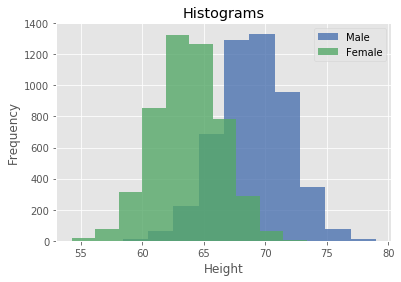

In [44]:
plt.hist(male_df['Height'], bins = 10, alpha = 0.8, label="Male" )
plt.hist(female_df['Height'], bins = 10, alpha = 0.8, label="Female")
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histograms')
plt.legend()
plt.show()

In [39]:
# Record your observations - are these inline with your personal observations?

#The histogram verifies my observations
# Both sets are normally distributed, centering around 64 for females and 69 formales

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

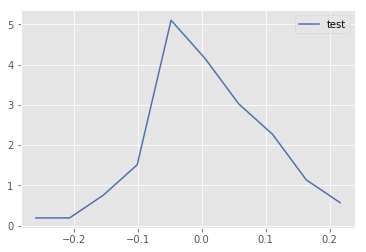

In [50]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    fx = np.zeros(n.size)
    fy = np.zeros(n.size)

    for k in range(n.size):
        fx[k] = 0.5*(bins[k]+bins[k+1])
        fy[k] = n[k]

    return fx, fy
    



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

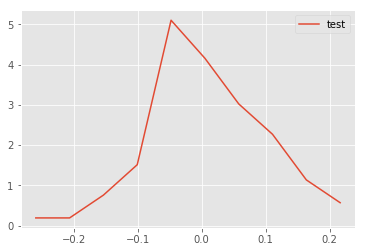

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

In [ ]:
# You code here 

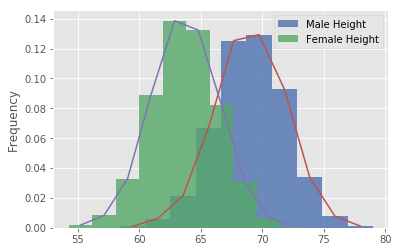

In [66]:
male_df['Height'].plot.hist(bins = 10, density = True,  alpha = 0.8, label ="Male Height");
female_df['Height'].plot.hist(bins = 10, density = True, alpha = 0.8, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)

#### Repeat above exerice for male and female weights

In [ ]:
# Your code here 

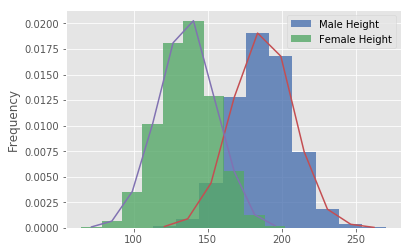

In [67]:
male_df['Weight'].plot.hist(bins = 10, density = True,  alpha = 0.8, label ="Male Height");
female_df['Weight'].plot.hist(bins = 10, density = True, alpha = 0.8, label = 'Female Height');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 
# Male heights are larger by around 3 inches on average and have a higher spread 
# Female weights Are centered around 15 while male around 185
# Both graphs, the data sets are fairly similar, with slight skews in opposite directions, with male values being higher but similarlydistributed



#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\Brian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Brian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Comparing Heights')

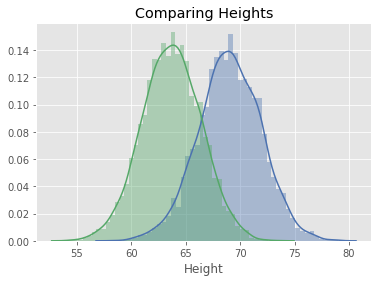

In [69]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')


C:\Users\Brian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Brian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Comparing Weights')

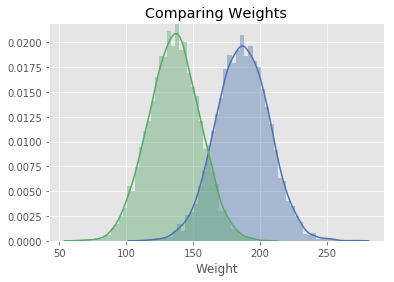

In [70]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')

In [71]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# Seaborn is a lot less code and more straight forward, however I know how to customize more the first way

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.